In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
import json
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns
import random
import os
import pickle
from scipy.interpolate import interp1d
from scipy.optimize import brentq
from sklearn import metrics
import os

In [2]:
main_dir=os.path.dirname(os.getcwd())
results_dir=os.path.join(main_dir, "Results")
brainInvaders_dir=os.path.join(results_dir, "BrainInvaders15a", 'Experiments')
COG_BCI_Flanker_dir=os.path.join(results_dir, "COG_BCI_Flanker", 'Experiments')
ERPCORE_N400_dir=os.path.join(results_dir, "ERPCORE_N400", 'Experiments')
ERPCORE_P300_dir=os.path.join(results_dir, "ERPCORE_P300", 'Experiments')
Huebner_LLP_dir=os.path.join(results_dir, "Huebner_LLP", 'Experiments')
Mantegna2019_dir=os.path.join(results_dir, "Mantegna2019", 'Experiments')
Sosulski2019_dir=os.path.join(results_dir, "Sosulski2019", 'Experiments')
Won2022_dir=os.path.join(results_dir, "Won2022", 'Experiments')

## Effect of Epochs Interval

Under this Experiment, we analyze the effect of different epochs duration on the performance of our authentication systems across all the datasets. We tested the epochs duration of 1 seconds (-0.2 to 0.8), 1.2 seconds (-0.2 to 1.0), 1.4 seconds (-0.2 to 1.2), 1.6 seconds (-0.2 to 1.4), 1.8 seconds (-0.2 to 1.6) and 2.0 (-0.2 to 1.8). Below Parameters were applied for conducting this experiment

<H3>Datasets</H3>

BrainInvaders15a, ERPCORE: N400, ERPCORE: N400, Mantegna2019, COG-BCI Flanker, Lee2019, Won2022,     Huebner2017, Sosulski2019

<H3>Utilized Parameters:</H3>

•   Filtering: Band Pass Filtering (1 to 50 Hz)

•   Epoch Interval: [-0.2, 0.8], [-0.2, 1.0], [-0.2, 1.2], [-0.2, 1.4], [-0.2, 1.6], [-0.2, 1.8]. 

•   Baseline Correction Applied: Yes

•   Epochs Rejection threshold: No Epochs Rejection

•   Features: AR (order=1), PSD

•   Classifiers: LDA, SVM, KNN, RF, NB, LR, Siamese 

•   Evaluation Type: Single-Session Evaluation

•   Threat Case: Open-Set


### Reading the results of dataset BrainInvaders15a

In [3]:
brain_shallow_classifiers_db=pd.read_csv(os.path.join(brainInvaders_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))
#brain_shallow_classifiers_db                                 

In [4]:
#brain_shallow_classifiers_db

### Reading the results of dataset ERPCORE:N400


In [5]:
erpcoreN400_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_N400_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

### Reading the results of dataset ERPCORE:P300


In [6]:
erpcoreP300_shallow_classifiers_db=pd.read_csv(os.path.join(ERPCORE_P300_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

### Reading the results of dataset COGBCI Flanker


In [7]:
cogbci_shallow_classifiers_db=pd.read_csv(os.path.join(COG_BCI_Flanker_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

### Reading the results of dataset Huebner2017


In [8]:
huebner_shallow_classifiers_db=pd.read_csv(os.path.join(Huebner_LLP_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

### Reading the results of dataset Sosulski2019


In [9]:
sosulski_shallow_classifiers_db=pd.read_csv(os.path.join(Sosulski2019_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

### Reading the results of dataset Mantegna2019


In [10]:
mantegna_shallow_classifiers_db=pd.read_csv(os.path.join(Mantegna2019_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

### Reading the results of dataset Won2022


In [11]:
won2022_shallow_classifiers_db=pd.read_csv(os.path.join(Won2022_dir, 'Different_Epochs_Interval', 'Shallow_Classifiers', 
                                                      'SOA_shallow_classifiers.csv'))

In [12]:
df_shallow_classifiers=pd.concat([brain_shallow_classifiers_db, erpcoreN400_shallow_classifiers_db, erpcoreP300_shallow_classifiers_db,
                                    cogbci_shallow_classifiers_db, huebner_shallow_classifiers_db, sosulski_shallow_classifiers_db,
                                    mantegna_shallow_classifiers_db, won2022_shallow_classifiers_db], axis=0)

In [13]:
df_shallow_classifiers.drop(columns=['evaluation', 'Unnamed: 0'], inplace=True)

In [14]:
df_shallow_classifiers

,eval Type,dataset,pipeline,subject,session,frr_1_far,frr_0.1_far,frr_0.01_far,eer,n_samples,epochs_duration
0,Open Set,Brain Invaders 2015a,AR+PSD+SVM,1,session_1,0.003623,0.003623,0.003623,0.003626,11913,1.0
1,Open Set,Brain Invaders 2015a,AR+PSD+SVM,2,session_1,0.000000,0.000000,0.000000,0.000010,11913,1.0
2,Open Set,Brain Invaders 2015a,AR+PSD+SVM,3,session_1,0.005682,0.005682,0.005682,0.002954,11913,1.0
3,Open Set,Brain Invaders 2015a,AR+PSD+SVM,4,session_1,0.008333,0.008333,0.008333,0.008338,11913,1.0
4,Open Set,Brain Invaders 2015a,AR+PSD+SVM,5,session_1,0.000000,0.000000,0.000000,0.000010,11913,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1975,Open Set,won 2022,AR+PSD+RF,51,session_1,0.035000,0.095000,0.183700,0.016762,11000,2.0
1976,Open Set,won 2022,AR+PSD+RF,52,session_1,0.005000,0.005000,0.005000,0.002785,11000,2.0
1977,Open Set,won 2022,AR+PSD+RF,53,session_1,0.005000,0.005000,0.005000,0.005008,11000,2.0
1978,Open Set,won 2022,AR+PSD+RF,54,session_1,0.010000,0.031000,0.112200,0.009110,11000,2.0


In [15]:
df_shallow_classifiers['pipeline'] = df_shallow_classifiers['pipeline'].apply(lambda x: x.split('+')[-1])


In [16]:
df_shallow_classifiers.dataset.unique()

array(['Brain Invaders 2015a', 'erpcore n400', 'erpcore p300',
       'COG-BCI Flanker', 'Visual Speller LLP', 'Spot Pilot P300 dataset',
       'mantegna 2019', 'won 2022'], dtype=object)

In [17]:
df_shallow_classifiers['dataset'].replace({'Visual Speller LLP': "Huebner2017", 'Spot Pilot P300 dataset':'Sosulski2019'})

0       Brain Invaders 2015a
1       Brain Invaders 2015a
2       Brain Invaders 2015a
3       Brain Invaders 2015a
4       Brain Invaders 2015a
                ...         
1975                won 2022
1976                won 2022
1977                won 2022
1978                won 2022
1979                won 2022
Name: dataset, Length: 11592, dtype: object

In [18]:
#df_sample_size.head()
grouped_df=df_shallow_classifiers.groupby(['dataset', 'pipeline','epochs_duration']).agg({
                #'accuracy': 'mean',
                'eer': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.1_far': lambda x: f'{np.mean(x)*100:.3f}',
                'frr_0.01_far': lambda x: f'{np.mean(x)*100:.3f}'
            }).reset_index()

#grouped_df

In [19]:
#RF_db

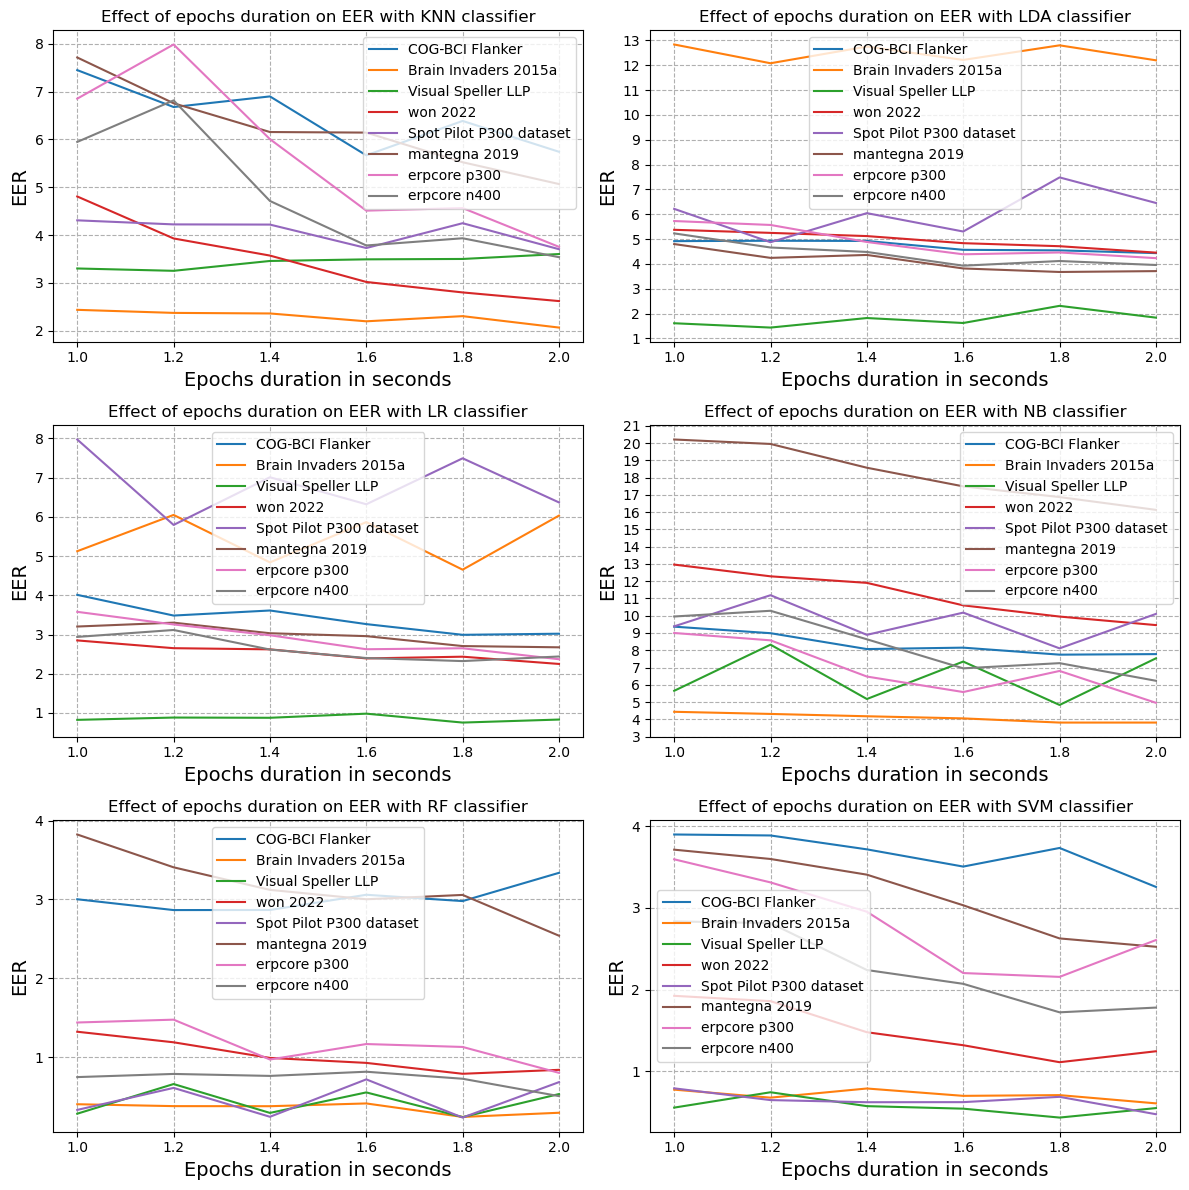

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots for each pipeline
fig, axs = plt.subplots(3,2, figsize=(12, 12))

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_df.pipeline.unique()):
    db = grouped_df[grouped_df['pipeline'] == pipeline]
    db['eer'] = db['eer'].astype('float64')

    # Choose the subplot for the current pipeline
    ax = axs[i]

    for dataset in set(db['dataset']):
        dataset_data = db[db['dataset'] == dataset]
        ax.plot(dataset_data['epochs_duration'], dataset_data['eer'], label=dataset)

    # Set labels and title
    ax.set_xlabel('Epochs duration in seconds', fontsize=14)
    ax.set_ylabel('EER', fontsize=14)
    ax.set_title("Effect of epochs duration on EER with "+ pipeline+" classifier")

    # Set y-axis ticks at intervals of 1
    ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))

    # Add legend
    ax.legend()
    ax.grid(True, ls="--", lw=0.8)

# Adjust layout
plt.tight_layout()
plt.show()


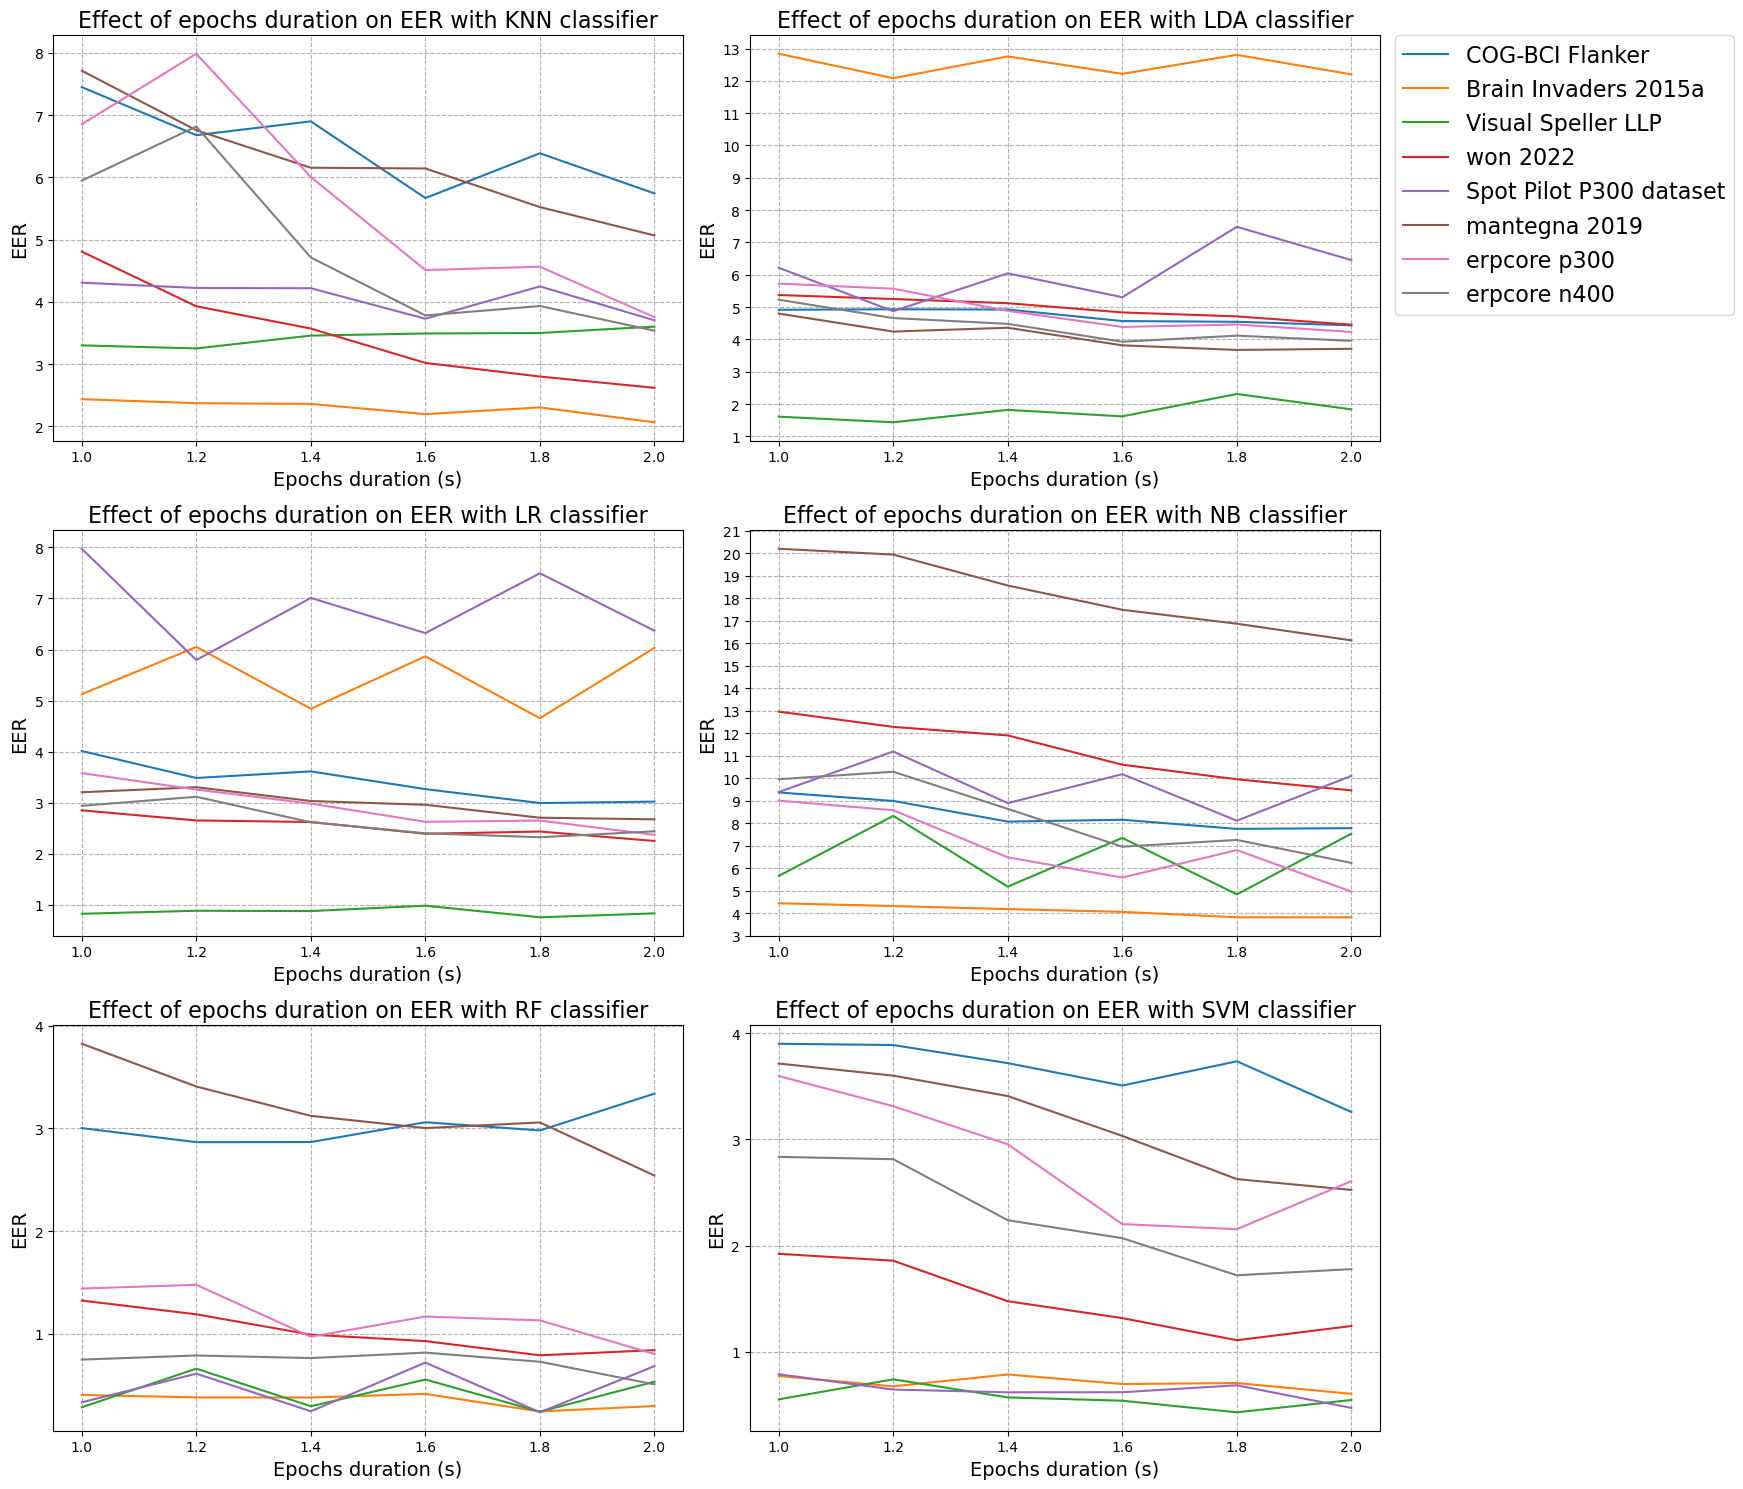

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots for each pipeline
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# Flatten the 2D array of subplots for easy iteration
axs = axs.flatten()

# Create an empty list to store legend handles and labels
legend_handles = []

# Iterate over each pipeline
for i, pipeline in enumerate(grouped_df.pipeline.unique()):
    db = grouped_df[grouped_df['pipeline'] == pipeline]
    db['eer'] = db['eer'].astype('float64')

    # Choose the subplot for the current pipeline
    ax = axs[i]

    for dataset in set(db['dataset']):
        dataset_data = db[db['dataset'] == dataset]
        line, = ax.plot(dataset_data['epochs_duration'], dataset_data['eer'], label=dataset)
        legend_handles.append(line)

    # Set labels and title
    ax.set_xlabel('Epochs duration (s)', fontsize=14)
    ax.set_ylabel('EER', fontsize=14)
    ax.set_title("Effect of epochs duration on EER with "+ pipeline+" classifier", fontsize=16)

    # Set y-axis ticks at intervals of 1
    ax.yaxis.set_major_locator(plt.MultipleLocator(base=1))
    ax.grid(True, ls="--", lw=0.8)

# Create a legend outside the subplots
fig.legend(legend_handles, set(grouped_df['dataset']), loc='upper right', bbox_to_anchor=(1.25, 0.98), fontsize=12, prop={'size': 16})
plt.subplots_adjust(right=0.60)  # Adjust layout to make room for the legend

# Adjust layout
plt.tight_layout()
plt.show()
